In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [15]:
df = pd.read_excel("Data.xlsx", header=[1], index_col=0)
returns = ((df.shift(1)-df)/df.shift(1)*100).shift(-1)
log_returns = (np.log(df / df.shift(1))).shift(-1)
log_returns_std = (log_returns - log_returns.mean()) / log_returns.std()

In [ ]:
def orthogonalize(target, others):
    data = log_returns_std[[target] + others].dropna()  # Drop rows with NaNs only in relevant columns
    X = data[others]
    y = data[target]
    model = LinearRegression().fit(X, y)
    residuals = pd.Series(y - model.predict(X), index=X.index)
    return residuals

pure_returns = pd.DataFrame(index=log_returns_std.index)

for target in log_returns_std.columns:
    others = [col for col in log_returns_std.columns if col != target]
    pure_returns[target + "_pure"] = orthogonalize(target, others)

pure_returns    #this is now uncorrelated time series with the other variables

,EFA US EQUITY_pure,NDDUEAFE INDEX_pure,IWM US EQUITY_pure,VB US EQUITY_pure,GDDUUS INDEX_pure,HYG US EQUITY_pure,JNK US EQUITY_pure,LQD US EQUITY_pure,LF98TRUU INDEX_pure,LUACTRUU INDEX_pure,...,IYR US EQUITY_pure,RMZ INDEX_pure,RMS G INDEX_pure,RMSG INDEX_pure,SPGCCITR INDEX_pure,EMB US EQUITY_pure,NDUEEGF INDEX_pure,VWO US EQUITY_pure,MLGUUSA INDEX_pure,MLVUUSA INDEX_pure
Dates,,,,,,,,,,,,,,,,,,,,,
2025-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-11,0.029505,0.124198,0.079744,0.018843,0.025709,0.011705,0.043418,-0.140548,-0.041751,-0.051953,...,-0.023803,-0.001319,-0.790387,0.004621,0.027286,0.068677,-0.272351,-0.050296,-0.047780,-0.055864
2025-06-10,0.224622,-0.022091,-0.014387,0.061768,0.023709,-0.020461,0.012064,-0.001544,0.075323,0.119330,...,-0.072590,-0.007816,-0.964348,0.014430,0.040373,-0.159903,-0.267755,-0.097108,-0.045175,-0.061646
2025-06-09,0.136624,-0.043824,-0.103080,0.038229,0.018878,0.085281,-0.101363,-0.100365,0.593802,-0.198566,...,-0.007811,0.019922,0.735463,-0.022260,-0.081788,-0.008126,-0.264044,-0.109303,-0.036160,-0.038273
2025-06-06,0.127437,0.276779,-0.156795,0.144290,0.018144,0.012466,0.019530,0.128765,-0.112960,-0.215927,...,0.098696,0.000953,-0.859346,-0.004756,-0.016614,-0.260780,-0.171585,0.047306,-0.038403,-0.050675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
pure_returns.corr()

,EFA US EQUITY_pure,NDDUEAFE INDEX_pure,IWM US EQUITY_pure,VB US EQUITY_pure,GDDUUS INDEX_pure,HYG US EQUITY_pure,JNK US EQUITY_pure,LQD US EQUITY_pure,LF98TRUU INDEX_pure,LUACTRUU INDEX_pure,...,IYR US EQUITY_pure,RMZ INDEX_pure,RMS G INDEX_pure,RMSG INDEX_pure,SPGCCITR INDEX_pure,EMB US EQUITY_pure,NDUEEGF INDEX_pure,VWO US EQUITY_pure,MLGUUSA INDEX_pure,MLVUUSA INDEX_pure
EFA US EQUITY_pure,1.000000,-0.609142,-0.022756,-0.010963,-0.029310,-0.036391,-0.009538,-0.030185,0.091317,0.051518,...,-0.026969,-0.015707,-0.044775,0.006312,0.118490,-0.045483,0.362367,-0.497725,0.010558,-0.029136
NDDUEAFE INDEX_pure,-0.609142,1.000000,0.013864,-0.001270,-0.009867,0.034382,0.022028,0.044752,-0.201128,-0.057643,...,0.054100,0.025885,0.057331,-0.022428,-0.212443,0.015599,-0.576096,0.354665,0.025279,0.016847
IWM US EQUITY_pure,-0.022756,0.013864,1.000000,-0.267902,0.372640,0.024181,-0.017375,-0.054646,0.006419,0.078577,...,-0.114377,-0.006471,0.029848,0.024679,0.092334,0.126953,-0.026268,0.030391,-0.357525,-0.345767
VB US EQUITY_pure,-0.010963,-0.001270,-0.267902,1.000000,-0.256552,0.009276,-0.011117,-0.032915,-0.058404,0.003870,...,0.110491,-0.009712,-0.012730,0.045210,0.080952,0.033380,-0.052477,0.035440,0.235245,0.238239
GDDUUS INDEX_pure,-0.029310,-0.009867,0.372640,-0.256552,1.000000,-0.027661,0.001969,-0.044404,0.058144,0.026011,...,-0.175986,0.030655,0.005554,-0.015911,-0.019329,0.103737,-0.029225,-0.026100,-0.993813,-0.980467
HYG US EQUITY_pure,-0.036391,0.034382,0.024181,0.009276,-0.027661,1.000000,-0.874872,-0.095996,-0.066760,-0.009298,...,-0.032507,0.043124,-0.021665,-0.033064,-0.022235,-0.042126,0.047296,-0.052471,0.024546,0.023234
JNK US EQUITY_pure,-0.009538,0.022028,-0.017375,-0.011117,0.001969,-0.874872,1.000000,-0.029486,-0.132710,0.038474,...,0.007291,-0.057565,0.012908,0.048467,0.035948,-0.046731,0.002724,0.010514,-0.001560,-0.003120
LQD US EQUITY_pure,-0.030185,0.044752,-0.054646,-0.032915,-0.044404,-0.095996,-0.029486,1.000000,0.114744,-0.461606,...,0.053735,0.022553,0.030155,-0.031221,0.016581,-0.188558,0.029779,-0.005747,0.043637,0.043230
LF98TRUU INDEX_pure,0.091317,-0.201128,0.006419,-0.058404,0.058144,-0.066760,-0.132710,0.114744,1.000000,-0.438347,...,-0.057265,-0.034369,0.060742,0.037437,-0.089234,-0.120517,-0.181034,0.147963,-0.062394,-0.058069
LUACTRUU INDEX_pure,0.051518,-0.057643,0.078577,0.003870,0.026011,-0.009298,0.038474,-0.461606,-0.438347,1.000000,...,0.011758,0.027073,-0.031496,-0.023977,0.063001,0.028288,-0.031427,0.049238,-0.028273,-0.037804


In [18]:
factor_groups = {
    # 1 ▸ Developed-market equity beta
    "Market": [
        "GDDUUS INDEX_pure",       # MSCI USA
        "EFA US EQUITY_pure",      # MSCI EAFE ETF
        "NDDUEAFE INDEX_pure",     # MSCI EAFE index
        "IWM US EQUITY_pure",      # Russell 2000
        "VB US EQUITY_pure"        # Vanguard Small-Cap
    ],

    # 2 ▸ Credit spread (Corp + Securitized)
    "Credit Risk": [
        "LQD US EQUITY_pure", "LUACTRUU INDEX_pure",   # IG corp
        "HYG US EQUITY_pure", "JNK US EQUITY_pure", "LF98TRUU INDEX_pure",  # HY corp
        "LUABTRUU INDEX_pure", "LUMSTRUU INDEX_pure", "LD19TRUU INDEX_pure" # ABS/MBS/CMBS
    ],

    # 3 ▸ Interest-rate duration / cash curve
    "Interest Rate Risk": [
        "TLT US EQUITY_pure",      # 20 y+ Treasuries
        "IGOV US EQUITY_pure",     # ex-US sovereigns
        "SBMMTB3 INDEX_pure",      # 3-m T-Bills
        "LD12TRUU INDEX_pure"      # 1-3 m T-Bills
    ],

    # 4 ▸ Inflation-linked Treasuries
    "Inflation Protection": [
        "TIP US EQUITY_pure", "LBUTTRUU INDEX_pure"
    ],

    # 5 ▸ Commodities & listed real assets
    "Commodities / Real Assets": [
        "GSG US EQUITY_pure", "SPGCCITR INDEX_pure",   # Broad commodities
        "GCUDUS INDEX_pure",                           # Gold (assumed)
        "VNQ US EQUITY_pure", "IYR US EQUITY_pure",    # REIT ETFs
        "RMZ INDEX_pure", "RMSG INDEX_pure", "RMS G INDEX_pure"
    ],

    # 6 ▸ Emerging-market beta (equity + sovereign)
    "Emerging Market / Sovereign Risk": [
        "NDUEEGF INDEX_pure", "VWO US EQUITY_pure",    # EM equity
        "EMB US EQUITY_pure"                           # EM sovereign debt
    ],

    # 7 ▸ Municipal / tax-sensitive
    "Municipal Bonds / Tax-Sensitive Instruments": [
        "MLGUUSA INDEX_pure", "MLVUUSA INDEX_pure"
    ]
}


within_group_corrs = []
between_group_corrs = []
corr = pure_returns.corr()
for group, members in factor_groups.items():
    # Within group
    for i in range(len(members)):
        for j in range(i + 1, len(members)):
            corr_ij = corr.loc[members[i], members[j]]
            within_group_corrs.append(corr_ij)
    
    # Between group
    for other_group, others in factor_groups.items():
        if other_group != group:
            for m1 in members:
                for m2 in others:
                    between_group_corrs.append(corr.loc[m1, m2])

print("Avg within-group corr: ", np.mean(within_group_corrs))
print("Avg between-group corr: ", np.mean(between_group_corrs))


Avg within-group corr:  -0.09847490002548492
Avg between-group corr:  -0.010737990690713774


In [39]:
# sns.clustermap(corr, cmap="coolwarm", center=0)
# plt.show()

In [41]:
factor_returns = pd.DataFrame(index=pure_returns.index)

for factor, assets in factor_groups.items():
    # Average across all the pure returns in this group
    factor_returns[factor] = pure_returns[assets].mean(axis=1)

factor_returns.mean()

Market                                         2.446418e-18
Credit Risk                                    0.000000e+00
Interest Rate Risk                             1.236085e-17
Inflation Protection                           4.828456e-18
Commodities / Real Assets                     -2.446418e-18
Emerging Market / Sovereign Risk              -6.180424e-18
Municipal Bonds / Tax-Sensitive Instruments   -1.351968e-18
dtype: float64

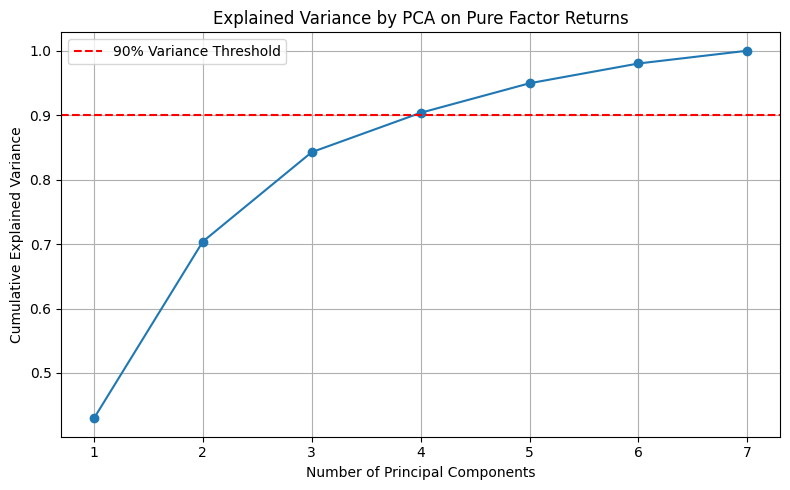

In [34]:
pca = PCA()
pca.fit(factor_returns.dropna())  # Fit PCA on the factor returns
explained = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA on Pure Factor Returns")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()